<a href="https://colab.research.google.com/github/ss20648/CE888/blob/main/Lab%206/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [3]:
country=pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
country_clusters_kmeans=cluster.KMeans(n_clusters=3)
country_clusters_kmeans.fit(country.values[:, 1:])
country_clusters_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [6]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(country.iloc[:, 1:], country_clusters_kmeans.labels_))

Silhouette Coefficient: 0.700


In [7]:
country['PredictedCategory']=country_clusters_kmeans.labels_+1

In [8]:
country['PredictedCategory'].value_counts()

2    128
1     32
3      7
Name: PredictedCategory, dtype: int64

In [10]:
vars_1=country.loc[country['PredictedCategory']==1, :].values[:, 1:]
vars_2=country.loc[country['PredictedCategory']==2, :].values[:, 1:]
vars_3=country.loc[country['PredictedCategory']==3, :].values[:, 1:]

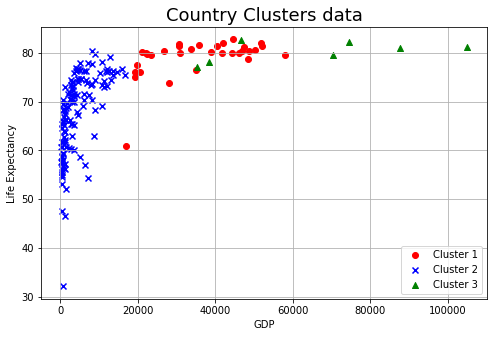

In [11]:
plt.figure(figsize=(8,5))
plt.title("Country Clusters data", fontsize=18)
plt.grid(True)

plt.scatter(vars_1[:,-2],vars_1[:,6],c='red', marker='o')
plt.scatter(vars_2[:,-2],vars_2[:,6],c='blue', marker='x')
plt.scatter(vars_3[:,-2],vars_3[:,6],c='green', marker='^')

plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.savefig('Country.png', dpi=300)
plt.show()

We can observe that the **Cluster 1(In red circles)** elements indicate low GDP and relatively lower life expectancy. With this observation, it can be concluded that countries in cluster 1 are **under-developed** countries.


The **Cluster 2(In blue crosses)** elements indicate mediocre/average GDP and decent life expectancy. It can be coincluded that these are **developing** countries.


The **Cluster 3(In green triangles)** elements indicate high GDP and best life expectancy. The countries in this cluster can be concluded to be **developed** countries.

In [12]:
print('1 :', 'Under-Developed ')
print('2 :', 'Developing ')
print('3 :', 'Developed ')

1 : Under-Developed 
2 : Developing 
3 : Developed 


Hence, 

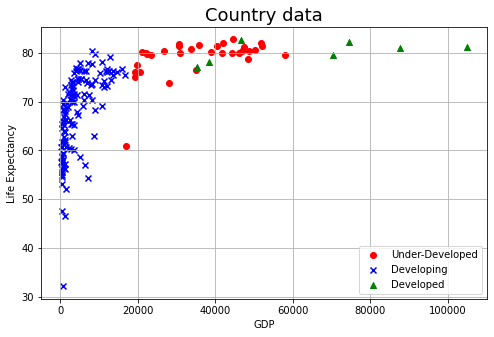

In [13]:
plt.figure(figsize=(8,5))
plt.title("Country data", fontsize=18)
plt.grid(True)

plt.scatter(vars_1[:,-2],vars_1[:,6],c='red', marker='o')
plt.scatter(vars_2[:,-2],vars_2[:,6],c='blue', marker='x')
plt.scatter(vars_3[:,-2],vars_3[:,6],c='green', marker='^')

plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.legend(['Under-Developed', 'Developing', 'Developed'])
plt.savefig('Country_Clusters_.png', dpi=300)
plt.show()

In [15]:
print('under-developed :')
(country.loc[country['PredictedCategory']==1, ['country']])

under-developed :


,country
7,Australia
8,Austria
10,Bahamas
11,Bahrain
15,Belgium
29,Canada
42,Cyprus
43,Czech Republic
44,Denmark
49,Equatorial Guinea


In [17]:
print('developing countries :')
(country.loc[country['PredictedCategory']==2, ['country']])

developing countries :


,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda
...,...
162,Vanuatu
163,Venezuela
164,Vietnam
165,Yemen


In [18]:
print(' developed countries :')
(country.loc[country['PredictedCategory']==3, ['country']])

 developed countries :


,country
23,Brunei
82,Kuwait
91,Luxembourg
114,Norway
123,Qatar
133,Singapore
145,Switzerland
